# REGRESIÓN LINEAL 

### **¿Qué es la regresión?** 

Es una técnica utilizada en machine learning supervisado, para predecir un valor continuo (o numérico) a partir de un conjunto de datos de entrenamiento. Es uno de los tipos más comunes de modelos supervisados, donde el modelo aprende a partir de ejemplos etiquetados (es decir, datos de entrada junto con sus correspondientes valores de salida).

### **¿Cómo funciona la regresión?**

Entrenamiento con datos etiquetados: Se tiene un conjunto de datos que consta de variables independientes (características de entrada) y una variable dependiente (el valor de salida que queremos predecir). Por ejemplo, si estamos prediciendo el precio de una casa, las características de entrada podrían ser el tamaño de la casa, el número de habitaciones, la ubicación, etc., y el valor de salida sería el precio de la casa.

Modelo de regresión: El objetivo del modelo de regresión es aprender una función matemática que relacione las características de entrada con el valor de salida. Este modelo puede ser una simple ecuación lineal (como en la regresión lineal) o una función más compleja (como en la regresión polinómica o modelos de redes neuronales).

Predicción: Una vez entrenado el modelo, se puede usar para predecir el valor de salida (la variable dependiente) para nuevos datos de entrada no vistos durante el entrenamiento.

### **Tipos comunes de regresión**
**Regresión lineal:** Es el tipo más simple y común de regresión. Asume que hay una relación lineal entre las variables independientes y la variable dependiente. 

**Regresión polinómica:** Es una extensión de la regresión lineal, donde se utilizan potencias de las características de entrada para capturar relaciones no lineales entre las variables.

**Regresión logística:** Aunque se llama "regresión", en realidad es un modelo de clasificación. Se utiliza cuando la variable de salida es categórica (por ejemplo, sí/no), y predice probabilidades de que ocurra un evento.

**Regresión de Ridge y Lasso:** Son variantes de la regresión lineal que agregan un término de regularización para evitar el sobreajuste (overfitting). Ridge utiliza la regularización L2, mientras que Lasso utiliza la regularización L1.

**Regresión de soporte vectorial (SVR):** Utiliza técnicas de máquinas de soporte vectorial para modelar la relación entre las características y el valor de salida, especialmente útil en escenarios donde se requieren modelos no lineales.

### ***Evaluación del modelo**
Para medir el desempeño de un modelo de regresión, se utilizan varias métricas, como:

**Error cuadrático medio (MSE):** Mide la media de los errores al cuadrado entre las predicciones y los valores reales.

**Raíz del error cuadrático medio (RMSE):** Es la raíz cuadrada del MSE, lo que da una medida de la magnitud de los errores en las mismas unidades de la variable dependiente.

**Coeficiente de determinación (R²):** Mide qué tan bien se ajusta el modelo a los datos, es decir, qué porcentaje de la varianza de la variable dependiente se explica por las variables independientes.

En resumen, la regresión en machine learning supervisado es una herramienta fundamental para predecir valores continuos y tiene una amplia gama de aplicaciones en la vida real.





Importamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [2]:
lista_alumnos = [("Caranchoa", 24, 1.82), 
                 ("Leo Messi", 25, 1.71), 
                 ("El bicho", 35, 1.66), 
                 ("Paquirrin", 37, 1.63), 
                 ("John Cobra", 29, 1.90), 
                 ("El tomate", 27, 1.80), 
                 ("El chucky de cieza", 28, 1.70), 
                 ("Chiquito de la Calzada", 32, 1.60), 
                 ("El cuñao", 36, 1.74), 
                 ("Rafa Nadal", 45, 1.72), 
                 ("Pau Gasol", 41, 1.65), 
                 ("El hermano de Pau Gasol", 30, 1.65), 
                 ("Joselito", 40, 1.60), 
                 ("Maria Isabel", 39, 1.80), 
                 ("Melody", 23, 1.77), 
                 ("Las ketchup", 32, 1.75), 
                 ("Pumuki", 27, 1.70), 
                 ("Naranjito", 34, 1.80), 
                 ("Espinete", 27, 1.77), 
                 ("El Feli", 28, 1.70), 
                 ("Jose Luis", 35, 1.80)] 

En primer lugar, creamos el df, renombrando las columnas

In [3]:
lista_alumnos = pd.DataFrame(lista_alumnos)
lista_alumnos = lista_alumnos.rename(columns={0:"nombre", 1:"edad", 2:"altura"})

In [4]:
lista_alumnos

,nombre,edad,altura
0,Caranchoa,24,1.82
1,Leo Messi,25,1.71
2,El bicho,35,1.66
3,Paquirrin,37,1.63
4,John Cobra,29,1.90
5,El tomate,27,1.80
6,El chucky de cieza,28,1.70
7,Chiquito de la Calzada,32,1.60
8,El cuñao,36,1.74
9,Rafa Nadal,45,1.72


Miramos la información del df, miramos si hay nans, si las columnas están en tipo object, float o int

In [5]:
# Muestra la info
lista_alumnos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   nombre  21 non-null     object 
 1   edad    21 non-null     int64  
 2   altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 636.0+ bytes


Miramos las estadísticas del df, si la media es muy alta en unas columnas y en otras no, en este caso habría que normalizar los datos.

In [6]:
# Muestra los estadísticos del df
lista_alumnos.describe()


,edad,altura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


Generamos un scatter plot para conocer la distribución de los datos

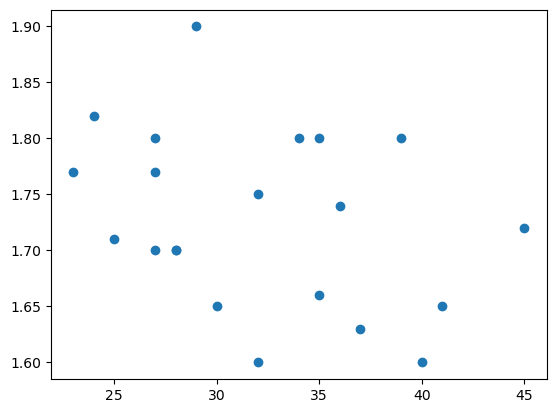

In [7]:
# Genera un scatter plot con Edad y Altura
plt.scatter(x = lista_alumnos.loc[:, "edad"], y= lista_alumnos.loc[:, "altura"])

Así mismo, generamos un heatmap para conocer la correlación de X e Y. En este caso, nos fijaremos cuáles son las x que tienen más correlación con las y para nuestra muestra, si hay x que tienen poca relación en todo caso tendríamos que valorar si nos las cargamos. 

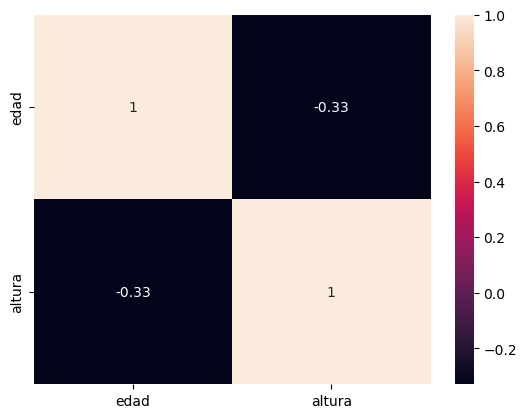

In [8]:
# Genera un heatmap
sns.heatmap(lista_alumnos.loc[: , ["edad", "altura"]].corr(), annot=True);

/var/folders/63/v12my1fn6ng3qhj_v65jgd000000gn/T/ipykernel_2106/1326017935.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lista_alumnos.loc[:, "altura"]);


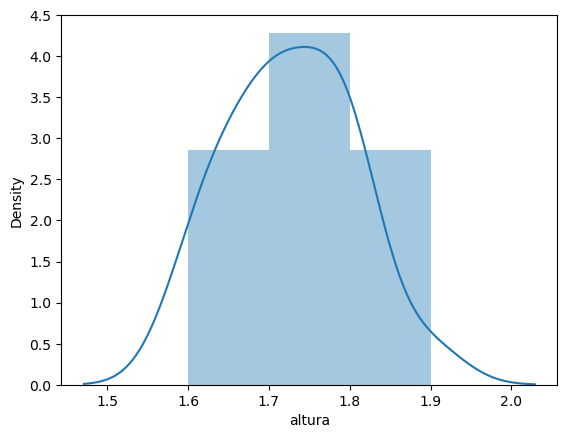

In [9]:
sns.distplot(lista_alumnos.loc[:, "altura"]);

Una vez ya hemos visto la relación de las x (variables independiente o variables de entrada) junto con las y (variable independiente, variable de salida), pasamos a entrenar el modelo de Machina Learning Supervisado

### Training a lineal regresion model (x,y)

Divide el df en features (X) y target (y)

Paso 1.  Asignamos las variables para las x y el target y

In [10]:
x = lista_alumnos.loc[:, ["edad"]]
y = lista_alumnos.loc[:, "altura"]

## Preparamos las muestras para el modelo

Importamos la librería sklearn, dentro de esta model_selection > train_test_split

Para ello, dividimos los datos en conjuntos de entrenamiento y test, en este caso se le ha asignado un 30% de test, por lo que entrenamos el modelo con el 70% de los datos y lo testeamos con el 30% restante.

Qué es random_state: random_state=42: Es un valor que establece la semilla del generador de números aleatorios. Esto garantiza que la división de los datos sea reproducible; es decir, cada vez que corras el código con el mismo valor de random_state, obtendrás la misma división de los datos. Si no estableces un valor específico para random_state, obtendrás una división diferente cada vez que ejecutes el código.

x_train, x_test, y_train, y_test: Son las variables que almacenarán los datos divididos:

x_train: Conjunto de características de entrenamiento (70% de los datos).

x_test: Conjunto de características de prueba (30% de los datos).

y_train: Conjunto de variable objetivo de entrenamiento (correspondiente al 70% de los datos).

y_test: Conjunto de variable objetivo de prueba (correspondiente al 30% de los datos).

In [11]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjunto de entrenamiento y test
# Siendo el tamaño del conjunto test un 30% y la semilla sea 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

**X.shape** devuelve las dimensiones de x, que será una tupla con el número de filas y columnas. Por ejemplo, si x tiene 1000 muestras y 10 características, la salida sería (1000, 10).

**X_train.shape** devuelve las dimensiones de x_train, es decir, el número de muestras de entrenamiento y el número de características. Por ejemplo, si se dividieron 1000 muestras y 10 características en un 70%-30%, la salida podría ser (700, 10) si tienes 700 muestras para entrenamiento.

**y_train.shape** devuelve las dimensiones de y_train, que corresponderá al número de muestras de entrenamiento. En el ejemplo anterior, debería ser (700,), ya que hay 700 etiquetas de salida para las 700 muestras de entrenamiento

**x_test.shape** devuelve las dimensiones de x_test, mostrando el número de muestras de prueba y el número de características. Siguiendo el ejemplo anterior, la salida podría ser (300, 10) si tienes 300 muestras de prueba.

**y_test.shape** devuelve las dimensiones de y_test, es decir, el número de muestras de prueba. Siguiendo el ejemplo, la salida podría ser (300,), ya que hay 300 etiquetas de salida para las 300 muestras de prueba

In [12]:
# Muestra el tamaño de X, X_train, y_train, X_test e y_test
print("Total features shape:", x.shape)
print("Train features shape:", x_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", x_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (21, 1)
Train features shape: (14, 1)
Train target shape: (14,)
Test features shape: (7, 1)
Test target shape: (7,)


## Instanciamos el modelo y lo entrenamos

Importamos las librerías necesarias.

LinearRegression() es una clase del módulo sklearn.linear_model que se utiliza para crear un modelo de regresión lineal. Lo asignamos a una variable.

Instanciación: La línea de código instancia un modelo de regresión lineal, pero aún no lo entrena. En este punto, lm es un modelo "vacío" que necesita ser ajustado (entrenado) con datos de entrenamiento.
Para entrenar el modelo, necesitarás usar el método fit() en un conjunto de datos. Por ejemplo: lm.fit(X_train, y_train) --> entrenamos el modelo con las variables de X e y train

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

## Evaluación del modelo

**Intercepto**

intercept_ es un atributo del modelo de regresión lineal que contiene el valor del intercepto de la recta ajustada.
En la ecuación de una regresión lineal simple (con una sola característica de entrada), el modelo tiene la forma: y=b0 + b1x.

Donde b0 es el intercepto, el valor de y cuando x=0

b1 es el coeficiente de la pendiente

Esta línea imprime el valor del intercepto (b0) del modelo de regresión lineal ajustado. El intercepto es el valor predicho de la variable dependiente 𝑦 y cuando todas las características de entrada son cero.

Un intercepto de 1.8520906282183314 significa que, según el modelo de regresión lineal, cuando todas las variables de entrada (x1, x2 ...) son cero, que x=0, la predicción de la variable objetivo 𝑦 y será aproximadamente 1.85. Este valor proporciona un punto de referencia para las predicciones del modelo.

**Coeficiente**

lm: Es la instancia del modelo de regresión lineal que has creado y entrenado previamente utilizando LinearRegression() y el método fit(). En este caso, lm ya contiene los parámetros aprendidos del modelo.
coef_:

Es un atributo del modelo de regresión lineal que almacena los coeficientes de la ecuación de la recta de regresión.

En un modelo de regresión lineal simple (con una sola característica), la ecuación tiene la forma: y = b0 +b1x1

Donde b0 es el intercepto. b1, b2 ...bn son los coeficientes que indican cómo cada característica x1, x2 ... afecta a la variable objeto y. 

.coef_ devuelve un array de valores que corresponden a los coeficientes b1, b2 ... del modelo. Estos coefieicnetes se calculan durante el proceso de entrenamiento y son lo que define la relación entre cada característica xi y la variable objetivo y.

**EJEMPLO**

Supongamos que tienes un modelo de regresión lineal con dos características de entrada, x1 y x2, y la ecuación del modelo resultante es: y = 3 +2x1 -1x2.

En este caso:
- El intercepto b0 = 3

- El coeficiente de x1 (es decir b1) es 2

- El coeficiente de x2 (es decir b2) es -1

Al llamar a print(lm.coef_) en este modelo, la salida sería algo como: [2. -1]

Este resultado indica que:

Para cada unidad que aumenta en x1, la variable objetivo y aumenta en 2 unidades. 

Para cada unidad que aumenta en x2, la variable objetivo 𝑦 y disminuye en 1 unidad (ya que el coeficiente es negativo).

¿Qué nos dice cada coeficiente?
**Coeficientes positivos:** Un coeficiente positivo indica que a medida que la característica xi aumenta, la variable objetivo 𝑦 y también aumenta.

**Coeficientes negativos:** Un coeficiente negativo indica que a medida que la característica xi aumenta la variable objetivo 𝑦 y disminuye.

**Valor cercano a cero:** Si un coeficiente está cerca de cero, significa que esa característica tiene una relación débil o casi nula con la variable objetivo.

In [37]:
# imprime el intercepto y el coeficiente
print(lm.intercept_)

1.8520906282183314


In [17]:
# imprime el intercepto y el coeficiente
print(lm.coef_)

[-0.00414006]


(Altura) = 1.85 - 0.0041*(Edad)

## Interpretación de coeficientes

In [18]:
coeff_df = pd.DataFrame(lm.coef_,
                        x.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
edad,-0.00414


## Predicciones de nuestro modelo

In [19]:
# Realiza una predicción con el conjunto de test
predictit = pd.DataFrame(x_test)
predictit

,edad
0,24
17,34
15,32
1,25
8,36
5,27
11,30


In [20]:
lista_alumnos = lista_alumnos.rename(columns={0:"nombre", 1:"edad", 2:"altura"})

In [21]:
# Crea un df con el conjunto de test
# df_test
# Añade una columna con la predicción
# Añade una columna con la altura real
predictions = lm.predict(x_test)
df_test = pd.DataFrame(x_test)
df_test = df_test.rename(columns={0:"prediccion"})
df_test["predicciones"]=predictions
df_test["altura"]=y_test
df_test

,edad,predicciones,altura
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


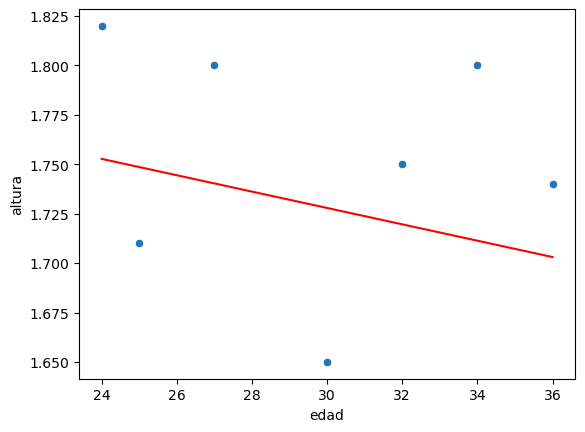

In [22]:
# Crea un plot con los datos reales y la predicción
sns.scatterplot(x=df_test.loc[:,"edad"], y=df_test.loc[:,"altura"]);
sns.lineplot(x = df_test["edad"], y = df_test["predicciones"], color="red");


La función score del modelo de regresión lineal, evalua el desempeño del modelo en un conjunto de prueba. En regresión lineal, el método score() devuelve el coeficiente de determinación R**2 o R al cuadrado, una medida que indica qué tan bien se ajusta el modelo a los datos de prueba.

Si el modelo es muy malo el R2 tiende a ser negativo, lo que indica que el modelo está haciendo peores predicciones que una simple media. 

Si por ejemplo nos da un score de 0.85% significa que la varianza de los datos de prueba es explicada por el modelo de regresión lineal. El modelo tiene un buen desempeño ya que su valor R2 es cercano a 1. 

In [23]:
# Muestra el score del módelo
from sklearn import metrics

lm.score(x_test, y_test)

-0.19742015635643928

## Métricas para evaluar el modelo

Tres métricas clave de evaluación de modelos de regresión: Mean Absolute Error (MAE), Mean Squared Error (MSE) y Root Mean Squared Error (RMSE). Estas métricas se utilizan para cuantificar el error entre las predicciones del modelo y los valores reales.

**MAE (Mean Absolute Error)** mide el error promedio entre las predicciones del modelo y los valores reales. Se calcula como el promedio de las diferencias absolutas entre las predicciones y los valores reales.
Interpretación:

Un MAE bajo indica que las predicciones están bastante cerca de los valores reales, es decir, el modelo está cometiendo pocos errores.

Un MAE alto indica que el modelo está haciendo errores grandes en las predicciones.

Ejemplo: Si el MAE es 5.2, eso significa que, en promedio, el modelo se equivoca en 5.2 unidades en sus predicciones.

**MSE (Mean Squared Error)** mide el error cuadrático medio entre las predicciones y los valores reales. Se calcula como el promedio de los cuadrados de las diferencias entre las predicciones y los valores reales.
Interpretación:
Un MSE bajo significa que las predicciones están cerca de los valores reales, pero es sensible a los errores grandes, ya que se elevan al cuadrado.

Un MSE alto indica que el modelo está cometiendo errores grandes en sus predicciones.

Ejemplo: Si el MSE es 30.25, esto indica que, en promedio, las diferencias al cuadrado entre las predicciones y los valores reales son de 30.25 unidades cuadradas.

**RMSE (Root Mean Squared Error)** es la raíz cuadrada del MSE. Al tomar la raíz cuadrada, el RMSE devuelve un valor en las mismas unidades que los datos originales, lo que lo hace más interpretable en comparación con el MSE.
Interpretación:

Un RMSE bajo indica que el modelo hace predicciones precisas.

Un RMSE alto indica que el modelo tiene grandes errores de predicción.

Ejemplo: Si el RMSE es 5.5, eso significa que, en promedio, el modelo se equivoca en 5.5 unidades (en las mismas unidades que los datos originales).

**MAPE** es una métrica que mide el error relativo entre las predicciones del modelo y los valores reales, expresado como un porcentaje. Es particularmente útil cuando se desea comprender el rendimiento del modelo de manera proporcional o relativa, en lugar de absoluta.
Interpreteción:

MAPE bajo: Un valor bajo de MAPE indica que el modelo tiene un buen rendimiento y hace predicciones cercanas a los valores reales en términos relativos.

MAPE alto: Un valor alto de MAPE significa que el modelo está cometiendo errores relativamente grandes, especialmente en comparación con los valores reales.

**EJEMPLO**

MAE = 3.5: El modelo tiene un error promedio de 3.5 unidades en sus predicciones.

MSE = 25.6: El error cuadrático promedio es 25.6, lo que indica que hay una cierta cantidad de error acumulado, con penalización por grandes errores.

RMSE = 5.06: La raíz cuadrada del error cuadrático medio es 5.06, lo que nos da un valor interpretativo en las mismas unidades de los datos.

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


In [38]:
# Muestra el Mean Absolute Error, el Mean Squared Error y el Root Mean Squared Error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))

MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306
MAPE: 0.03253724207144201


In [27]:
# Muestra cual sería la predicción para 85 años de edad
octogenario= 1.85 -0.0041*85
octogenario

1.5015

In [28]:
df_test

,edad,predicciones,altura
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


In [29]:
# Ahora vamos a calcular el MAE, MSE, RMSE y MAPE a mano

MAE =sum(np.abs(df_test["predicciones"] - df_test["altura"]))/len(df_test["predicciones"])
print('MAE:', MAE)

MSE = sum((df_test["altura"] - df_test["predicciones"])**2)/len(df_test["predicciones"])
print('MSE:', MSE)

RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)

MAPE = sum(np.abs((df_test["predicciones"] - df_test["altura"])/df_test["altura"]))/len(df_test["predicciones"])
print('MAPE:', MAPE)

MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306
MAPE: 0.03253724207144201


In [30]:
# Añade una columna con el error

df_test["error"] = np.abs(df_test["altura"]-df_test["predicciones"])
df_test

,edad,predicciones,altura,error
0,24,1.752729,1.82,0.067271
17,34,1.711329,1.80,0.088671
15,32,1.719609,1.75,0.030391
1,25,1.748589,1.71,0.038589
8,36,1.703048,1.74,0.036952
5,27,1.740309,1.80,0.059691
11,30,1.727889,1.65,0.077889


In [31]:
# Muestra el error medio
df_test["error"].mean()

0.05706488156539665

In [32]:
# Añade una columna que contenga el error cuadrático
df_test["error cuadratico"] = df_test["error"]**2
df_test

,edad,predicciones,altura,error,error cuadratico
0,24,1.752729,1.82,0.067271,0.004525
17,34,1.711329,1.80,0.088671,0.007863
15,32,1.719609,1.75,0.030391,0.000924
1,25,1.748589,1.71,0.038589,0.001489
8,36,1.703048,1.74,0.036952,0.001365
5,27,1.740309,1.80,0.059691,0.003563
11,30,1.727889,1.65,0.077889,0.006067


In [33]:
# Muestra el error cuadrático medio
error_cuadratico_medio = df_test.loc[:, "error cuadratico"].mean()
error_cuadratico_medio

0.0036851216240520687

In [34]:
# Muestra la raíz del error cuadrático medio
np.sqrt(error_cuadratico_medio)


0.060705202611078306

In [35]:
# Muestra el error absoluto medio porcentual
MAPE


0.03253724207144201